Dataset loaded successfully!
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtyp

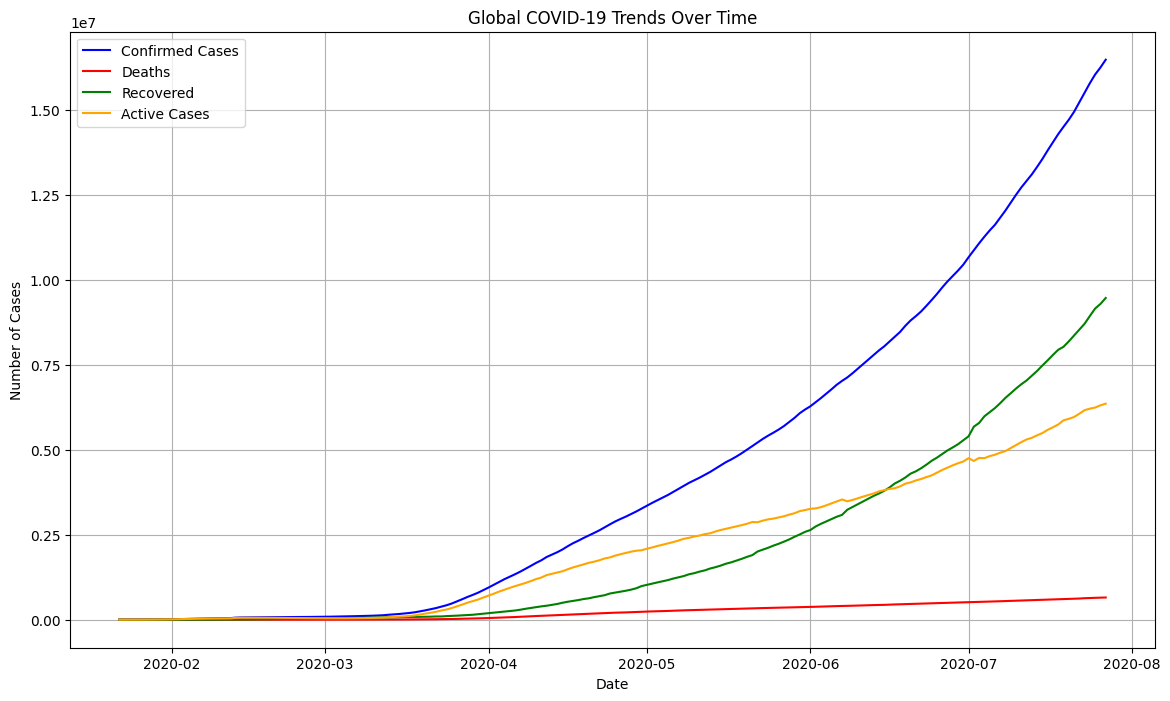

C:\Users\akalo\AppData\Local\Temp\ipykernel_1976\3695029196.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')


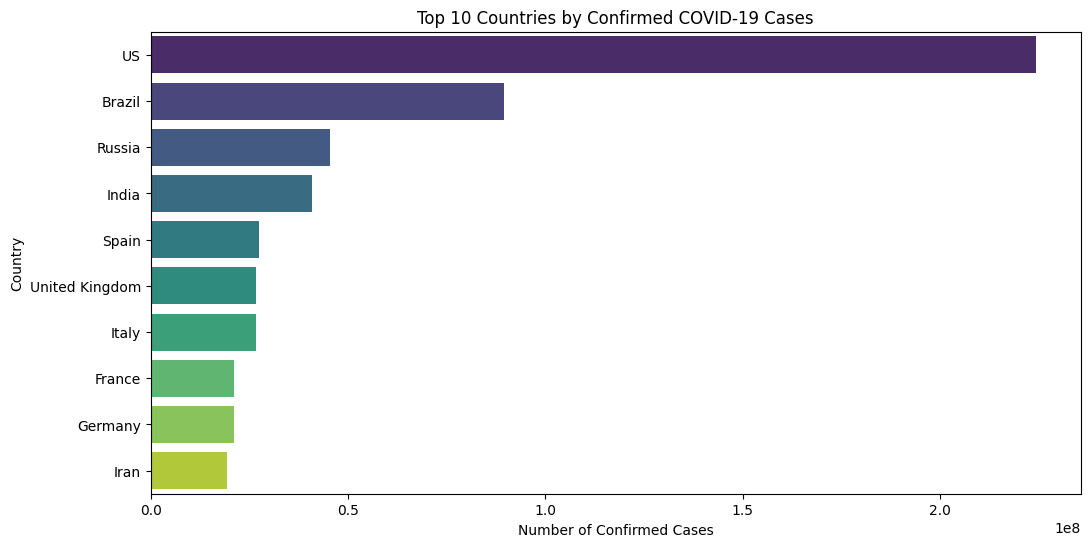

C:\Users\akalo\AppData\Local\Temp\ipykernel_1976\3695029196.py:106: FutureWarning: The provided callable <function sum at 0x000001AC19B1BBA0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  heatmap_data = covid_data.pivot_table(values='Confirmed', index='Country/Region', columns='Date', aggfunc=np.sum).fillna(0)


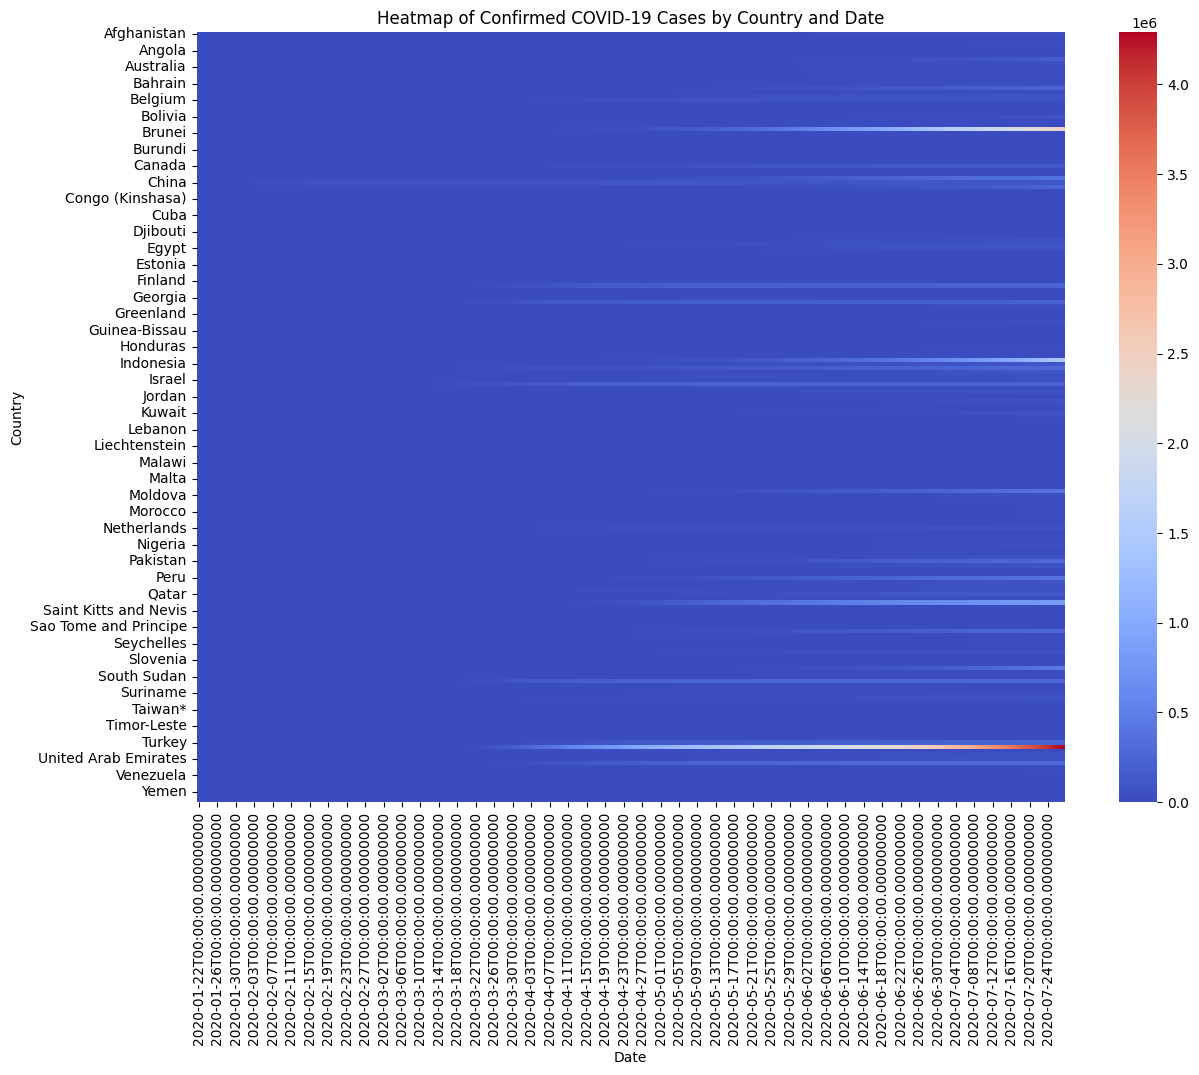


Total Confirmed Cases: 16480485
Total Deaths: 654036
Total Recoveries: 9468087


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Path to the ZIP file
zip_path = r"C:\Users\akalo\OneDrive\Desktop\Global COVID-19 Impact Analysis\archive (1).zip"

# Specify the file to extract and read
file_name = 'covid_19_clean_complete.csv'

# Open the ZIP file and read the specified CSV
with zipfile.ZipFile(zip_path, 'r') as z:
    if file_name in z.namelist():
        with z.open(file_name) as f:
            covid_data = pd.read_csv(f)
    else:
        raise FileNotFoundError(f"{file_name} not found in ZIP archive.")

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
print(covid_data.head())

# ----------------------------
# Step 1: Data Exploration
# ----------------------------

print("\nDataset Information:")
print(covid_data.info())

print("\nSummary Statistics:")
print(covid_data.describe())

print("\nMissing Values:")
print(covid_data.isnull().sum())

# ----------------------------
# Step 2: Data Cleaning
# ----------------------------

# Fill missing values with 0
covid_data.fillna(0, inplace=True)

# Convert 'Date' column to datetime if available
if 'Date' in covid_data.columns:
    covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Confirm no missing values remain
print("\nMissing Values After Cleaning:")
print(covid_data.isnull().sum())

# ----------------------------
# Step 3: Global Aggregation
# ----------------------------

# Group by date to calculate global cases and deaths
global_trends = covid_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Add Active Cases column
global_trends['Active'] = global_trends['Confirmed'] - global_trends['Deaths'] - global_trends['Recovered']

print("\nGlobal Trends Preview:")
print(global_trends.head())

# ----------------------------
# Step 4: Data Visualization
# ----------------------------

# Plot global trends over time
plt.figure(figsize=(14, 8))
plt.plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_trends['Date'], global_trends['Deaths'], label='Deaths', color='red')
plt.plot(global_trends['Date'], global_trends['Recovered'], label='Recovered', color='green')
plt.plot(global_trends['Date'], global_trends['Active'], label='Active Cases', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trends Over Time')
plt.legend()
plt.grid()
plt.show()

# ----------------------------
# Step 5: Country-Wise Analysis
# ----------------------------

# Group by country for the latest stats
country_stats = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Sort by confirmed cases
top_countries = country_stats.sort_values(by='Confirmed', ascending=False).head(10)

# Bar plot for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')
plt.show()

# ----------------------------
# Step 6: Heatmap of Case Distribution
# ----------------------------

# Pivot table for heatmap
heatmap_data = covid_data.pivot_table(values='Confirmed', index='Country/Region', columns='Date', aggfunc=np.sum).fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Confirmed COVID-19 Cases by Country and Date')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()

# ----------------------------
# Step 7: Insights
# ----------------------------

# Total global cases, deaths, and recoveries
total_cases = global_trends['Confirmed'].iloc[-1]
total_deaths = global_trends['Deaths'].iloc[-1]
total_recoveries = global_trends['Recovered'].iloc[-1]

print(f"\nTotal Confirmed Cases: {total_cases}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recoveries: {total_recoveries}")
